In [396]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
np.random.seed(0)

# Loading the dataset

In [397]:
abaloneDF = pd.DataFrame(pd.read_csv('./Weights/abalone.csv', header=None))
abaloneDF.columns = ['sex', 'length', 'diameter', 'height', 'whole weight', 'shucked weight', 'viscera weight', 'shell weight', 'rings']
print(abaloneDF.shape)
abaloneDF.head()

(4177, 9)


,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# Preprocessing the dataset

In [398]:
# counting the unique values in the sex column
np.unique(abaloneDF['sex'])

array(['F', 'I', 'M'], dtype=object)

## Encoding the categorical data in the sex column to numerical data

In [399]:
def encode(sex):
    if sex == 'M':
        return 2
    elif sex == 'F':
        return 1
    return 0

In [400]:
abaloneDF['sex'] = abaloneDF['sex'].apply(encode)

In [401]:
abaloneDF.head()

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Getting basic details of the dataset

In [402]:
abaloneDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   int64  
 1   length          4177 non-null   float64
 2   diameter        4177 non-null   float64
 3   height          4177 non-null   float64
 4   whole weight    4177 non-null   float64
 5   shucked weight  4177 non-null   float64
 6   viscera weight  4177 non-null   float64
 7   shell weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 293.8 KB


In [403]:
abaloneDF.describe()

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.044530,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.827815,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


## Dividing dataset in test and train samples

In [566]:
abaloneDF = abaloneDF.sample(frac=1.0).reset_index(drop=True)
abaloneDF.head()

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,0,0.425,0.325,0.115,0.3685,0.1620,0.0865,0.1045,7
1,2,0.625,0.520,0.175,1.4105,0.6910,0.3220,0.3465,10
2,1,0.560,0.420,0.180,1.6645,0.7755,0.3500,0.4525,9
3,1,0.650,0.545,0.230,1.7520,0.5605,0.2895,0.8150,16
4,2,0.330,0.235,0.090,0.1630,0.0615,0.0340,0.0550,10


In [567]:
trainSize = int(0.8 * len(abaloneDF))
trainData = abaloneDF[:trainSize].values
testData = abaloneDF[trainSize:].values

In [568]:
print(trainData.shape, testData.shape)

(3341, 9) (836, 9)


In [569]:
X_train = trainData[:, :8]
y_train = trainData[:, 8]
X_test = testData[:, :8]
y_test = testData[:, 8]

In [570]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(3341, 8) (3341,) (836, 8) (836,)


In [571]:
X_train

array([[0.    , 0.425 , 0.325 , ..., 0.162 , 0.0865, 0.1045],
       [2.    , 0.625 , 0.52  , ..., 0.691 , 0.322 , 0.3465],
       [1.    , 0.56  , 0.42  , ..., 0.7755, 0.35  , 0.4525],
       ...,
       [0.    , 0.375 , 0.29  , ..., 0.14  , 0.0625, 0.0825],
       [0.    , 0.465 , 0.355 , ..., 0.23  , 0.1005, 0.12  ],
       [0.    , 0.545 , 0.43  , ..., 0.302 , 0.1315, 0.2545]])

## Normalize the training data (each feature should have 0 mean and 1 standard deviation)

In [572]:
X_mean = np.mean(X_train, axis=0)
X_std = np.std(X_train, axis=0)

In [573]:
X_train = (X_train - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

In [574]:
# adding a column of 1's in the start of the training and test datas to denote X0
trainOnes = np.ones((trainData.shape[0], 1))
testOnes = np.ones((testData.shape[0], 1))
print(trainOnes.shape, testOnes.shape)
X_train = np.hstack((trainOnes, X_train))
X_test = np.hstack((testOnes, X_test))
print(X_train.shape, X_test.shape)


(3341, 1) (836, 1)
(3341, 9) (836, 9)


In [575]:
print(np.mean(X_train, axis=0))
print(np.std(X_train, axis=0))

[ 1.00000000e+00 -2.55208406e-17 -4.00889870e-16 -7.09266694e-16
  4.84895971e-16 -2.87109456e-17  3.16883770e-16  5.84852596e-17
  5.74218912e-17]
[0. 1. 1. 1. 1. 1. 1. 1. 1.]


# Linear Regression

## Writing the necessary functions

In [576]:
def hypothesis(X, theta):
    '''
    hypothesis function
    :param X: Input feature vector
    :param theta: parameter vector
    :return: hypothesis
    '''
    return np.dot(X, theta)

In [577]:
def error(X, y, theta):
    '''
    error function
    :param X: Input feature vector
    :param y: Desired Output vector
    :param theta: parameter vector
    :return: root mean squared error(RMSE)
    '''
    m = X.shape[0]
    y_ = hypothesis(X, theta)
    err = np.sum((y_ - y)**2)
    return err / m

In [578]:
def gradient(X, y, theta):
    '''
    gradient function
    :param X: Input feature vector
    :param y: Desired Output vector
    :param theta: parameter vector
    :return: gradient vector
    '''
    m = X.shape[0]
    y_ = hypothesis(X, theta)
    grad = np.dot(X.T, (y_ - y))
    return grad/m

In [579]:
def gradientDescent(X, y, learningRate=0.01, maxEpochs=1000):
    '''
    gradient descent function
    :param X: Input feature vector
    :param y: Desired Output vector
    :param learningRate: learning rate
    :param maxEpochs: maximum number of epochs
    :return: theta vector and error list
    '''
    m, n = X.shape
    theta = np.zeros((n,))
    errorList = []
    for i in tqdm(range(maxEpochs)):
        err = error(X, y, theta)
        errorList.append(err)
        grad = gradient(X, y, theta)
        theta = theta - learningRate * grad
    return theta, errorList

## Performing Regression

In [580]:
theta, errorList = gradientDescent(X_train, y_train)

100%|██████████| 1000/1000 [00:00<00:00, 1301.09it/s]


In [581]:
theta

array([ 9.97233211,  0.31733203,  0.32654042,  0.65724109,  0.56551242,
        0.30388163, -1.80936759, -0.21395661,  1.98911715])

In [582]:
plt.style.use('seaborn')
plt.style.use('ggplot')
plt.style.use('dark_background')

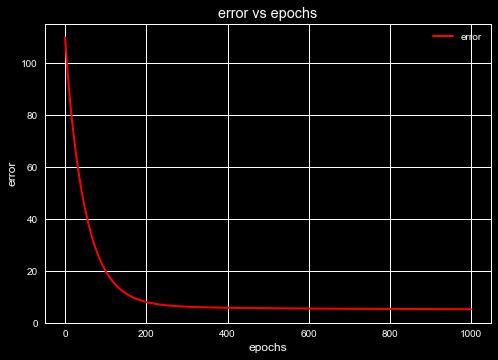

In [611]:
plt.plot(errorList, 'r-', label='error', linewidth=2)
plt.legend()
plt.xlabel('epochs')
plt.ylabel('error')
plt.title('error vs epochs')
plt.savefig('plots/Q1_error.png')
plt.show()

## Predictions

In [584]:
def getPredictionList(X, theta):
    '''
    get prediction list
    :param X: Input feature vector
    :param theta: parameter vector
    :return: prediction list
    '''
    y_ = []
    for i in tqdm(range(X.shape[0])):
        pred = hypothesis(X[i], theta)
        y_.append(pred)
    y_ = np.array(y_)
    return y_

In [585]:
def rmse(X, y, theta):
    '''
    root mean squared error
    :param X: Input feature vector
    :param y: Desired Output vector
    :param theta: parameter vector
    :return: root mean squared error(RMSE)
    '''
    y_ = getPredictionList(X, theta)
    return np.sqrt(np.mean((y_ - y)**2).mean())

In [586]:
print("RMSE on training data: " + str(rmse(X_train, y_train, theta)))
print("RMSE on test data: " + str(rmse(X_test, y_test, theta)))

100%|██████████| 836/836 [00:00<00:00, 41062.84it/s]

RMSE on training data: 2.279332879759095
RMSE on test data: 2.219821998097297


# Ridge Regression

## Plotting Graph

In [587]:
from sklearn.linear_model import Ridge

In [588]:
def ridgeRMSE(y, y_):
    '''
    root mean squared error
    :param y: Desired Output vector
    :param y_: predicted Output vector
    :return: root mean squared error(RMSE)
    '''
    return np.sqrt(np.mean((y_ - y)**2).mean())

In [698]:
# storing the alphas, train errors and test errors
alphaList = []
trainRMSEList = []
testRMSEList = []
# Equally Dividing the alphas in 10 intervals between -1 and 5
alphas = np.linspace(-1, 5, 10)
# Also string the minimum rmse and corresponding alpha and theta for both train and test data
minTrainRMSE = np.inf
minTrainAlpha = 0
minTrainTheta = []
minTestRMSE = np.inf
minTestAlpha = 0
minTestTheta = []
for i in tqdm(range(len(alphas))):
    # Ridge regression with alpha = alphas[i]
    ridgeModel = Ridge(alpha=alphas[i], fit_intercept=True, normalize=False, copy_X=True)
    ridgeModel.fit(X_train, y_train)
    # get the prediction list on training data
    y_ = ridgeModel.predict(X_train)
    currTrainRMSE = ridgeRMSE(y_train, y_)
    # get the prediction list on test data
    y_ = ridgeModel.predict(X_test)
    currTestRMSE = ridgeRMSE(y_test, y_)
    trainRMSEList.append(currTrainRMSE)
    testRMSEList.append(currTestRMSE)
    alphaList.append(alphas[i])
    if currTrainRMSE < minTrainRMSE:
        minTrainRMSE = currTrainRMSE
        minTrainAlpha = alphas[i]
        minTrainTheta = ridgeModel.coef_
    if currTestRMSE < minTestRMSE:
        minTestRMSE = currTestRMSE
        minTestAlpha = alphas[i]
        minTestTheta = ridgeModel.coef_
print("Minimum RMSE on train: " + str(minTrainRMSE) + " for alpha: " + str(minTrainAlpha) + " and optimum parameters: " + str(minTrainTheta))
print("Minimum RMSE on test: " + str(minTestRMSE) + " for alpha: " +
      str(minTestAlpha) + " and optimum parameters: " + str(minTestTheta))


100%|██████████| 10/10 [00:00<00:00, 41.21it/s]

Minimum RMSE on train: 2.204470148926996 for alpha: 0.33333333333333326 and optimum parameters: [ 0.          0.30103555 -0.03959001  1.12255539  0.40932199  4.42852419
 -4.45313265 -1.03359217  1.24530904]
Minimum RMSE on test: 2.1726571304502427 for alpha: 2.333333333333333 and optimum parameters: [ 0.          0.30200709 -0.02555882  1.1041071   0.41148058  4.08611562
 -4.28969515 -0.95373125  1.35709293]


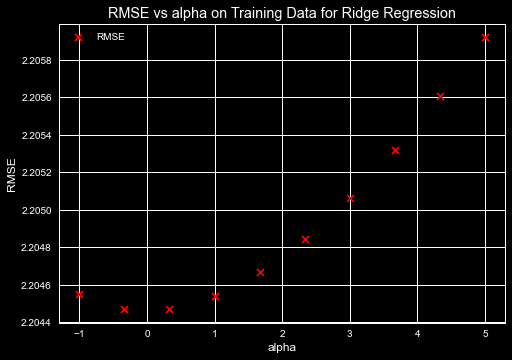

In [665]:
plt.scatter(alphaList, trainRMSEList, c='r', marker='x', label='RMSE')
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.title('RMSE vs alpha on Training Data for Ridge Regression')
plt.legend()
plt.savefig('plots/Q1_rmseVsAlphaTrainingDataScatterRidge.png')
plt.show()

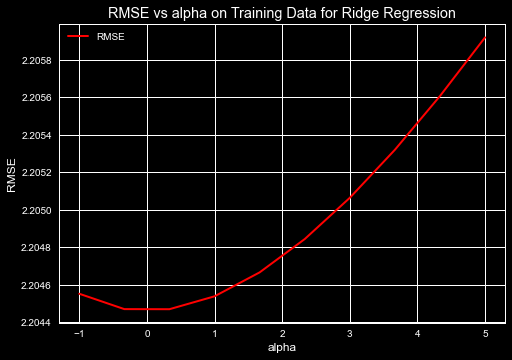

In [699]:
plt.plot(alphaList, trainRMSEList, 'r-', label='RMSE', linewidth=2)
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.title('RMSE vs alpha on Training Data for Ridge Regression')
plt.legend()
plt.savefig('plots/Q1_rmseVsAlphaTrainingDataLineRidge.png')
plt.show()

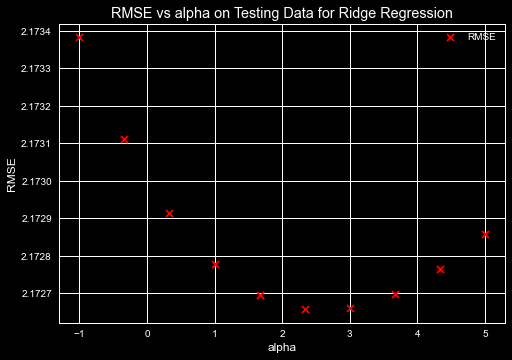

In [667]:
plt.scatter(alphaList, testRMSEList, c='r', marker='x', label='RMSE')
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.title('RMSE vs alpha on Testing Data for Ridge Regression')
plt.legend()
plt.savefig('plots/Q1_rmseVsAlphaTestingDataScatterRidge.png')
plt.show()

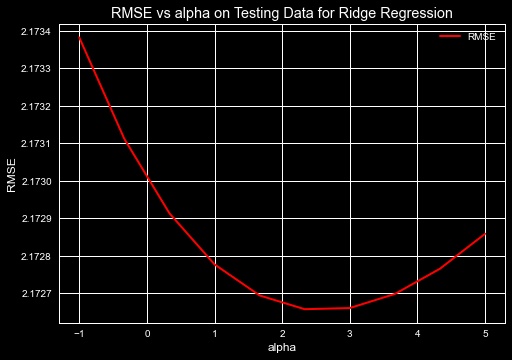

In [668]:
plt.plot(alphaList, testRMSEList, 'r-', label='RMSE', linewidth=2)
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.title('RMSE vs alpha on Testing Data for Ridge Regression')
plt.legend()
plt.savefig('plots/Q1_rmseVsAlphaTestingDataLineRidge.png')
plt.show()

## Using GridSearchCV to find the best model

In [669]:
from sklearn.model_selection import GridSearchCV

In [670]:
alphas = np.linspace(-1, 5, 100)

In [671]:
ridgeGridModel = Ridge(fit_intercept=True, normalize=False, copy_X=True)

In [672]:
ridgeGrid = GridSearchCV(estimator=ridgeGridModel, param_grid={'alpha': alphas})

In [673]:
ridgeGrid.fit(X_train, y_train)
print(ridgeGrid.best_params_)

{'alpha': 0.5151515151515151}


# Lasso Regression

In [674]:
from sklearn.linear_model import Lasso

In [675]:
def lassoRMSE(y, y_):
    '''
    root mean squared error
    :param y: Desired Output vector
    :param y_: predicted Output vector
    :return: root mean squared error(RMSE)
    '''
    return np.sqrt(np.mean((y_ - y)**2).mean())


In [700]:
# storing the alphas, train errors and test errors
alphaList = []
trainRMSEList = []
testRMSEList = []
# Equally Dividing the alphas in 10 intervals between 0.001 and 5
alphas = np.linspace(0.001, 5, 10)
# Also string the minimum rmse and corresponding alpha and theta for both train and test data
minTrainRMSE = np.inf
minTrainAlpha = 0
minTrainTheta = []
minTestRMSE = np.inf
minTestAlpha = 0
minTestTheta = []
for i in tqdm(range(len(alphas))):
    # Lasso regression with alpha = alphas[i]
    lassoModel = Lasso(alpha=alphas[i], fit_intercept=True, normalize=False, copy_X=True)
    lassoModel.fit(X_train, y_train)
    # get the prediction list on training data
    y_ = lassoModel.predict(X_train)
    currTrainRMSE = lassoRMSE(y_train, y_)
    # get the prediction list on test data
    y_ = lassoModel.predict(X_test)
    currTestRMSE = lassoRMSE(y_test, y_)
    trainRMSEList.append(currTrainRMSE)
    testRMSEList.append(currTestRMSE)
    alphaList.append(alphas[i])
    if currTrainRMSE < minTrainRMSE:
        minTrainRMSE = currTrainRMSE
        minTrainAlpha = alphas[i]
        minTrainTheta = lassoModel.coef_
    if currTestRMSE < minTestRMSE:
        minTestRMSE = currTestRMSE
        minTestAlpha = alphas[i]
        minTestTheta = lassoModel.coef_
print("Minimum RMSE on train: " + str(minTrainRMSE) + " for alpha: " + str(minTrainAlpha) + " and optimum parameters: " + str(minTrainTheta))
print("Minimum RMSE on test: " + str(minTestRMSE) + " for alpha: " +
      str(minTestAlpha) + " and optimum parameters: " + str(minTestTheta))


100%|██████████| 10/10 [00:00<00:00, 45.49it/s]

Minimum RMSE on train: 2.2045190015302523 for alpha: 0.001 and optimum parameters: [ 0.          0.30050022 -0.          1.08169883  0.40806419  4.35635215
 -4.42285461 -1.00708475  1.26537164]
Minimum RMSE on test: 2.173205956270856 for alpha: 0.001 and optimum parameters: [ 0.          0.30050022 -0.          1.08169883  0.40806419  4.35635215
 -4.42285461 -1.00708475  1.26537164]


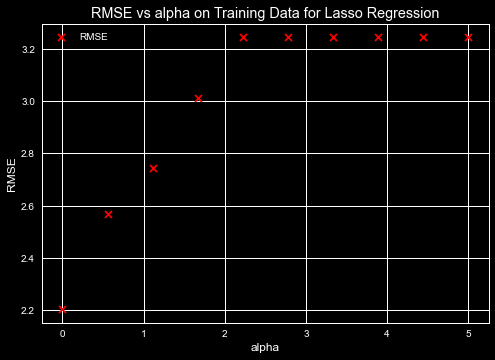

In [694]:
plt.scatter(alphaList, trainRMSEList, c='r', marker='x', label='RMSE')
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.title('RMSE vs alpha on Training Data for Lasso Regression')
plt.legend()
plt.savefig('plots/Q1_rmseVsAlphaTrainingDataScatterLasso.png')
plt.show()

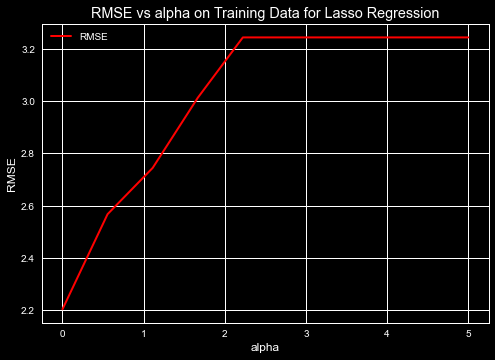

In [696]:
plt.plot(alphaList, trainRMSEList, 'r-', label='RMSE', linewidth=2)
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.title('RMSE vs alpha on Training Data for Lasso Regression')
plt.legend()
plt.savefig('plots/Q1_rmseVsAlphaTrainingDataLineLasso.png')
plt.show()

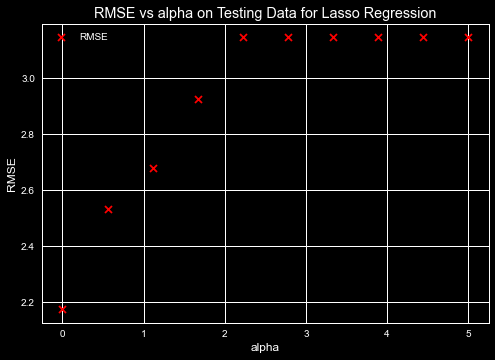

In [697]:
plt.scatter(alphaList, testRMSEList, c='r', marker='x', label='RMSE')
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.title('RMSE vs alpha on Testing Data for Lasso Regression')
plt.legend()
plt.savefig('plots/Q1_rmseVsAlphaTestingDataScatterLasso.png')
plt.show()

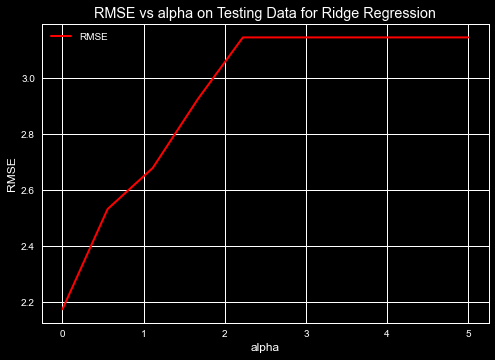

In [701]:
plt.plot(alphaList, testRMSEList, 'r-', label='RMSE', linewidth=2)
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.title('RMSE vs alpha on Testing Data for Ridge Regression')
plt.legend()
plt.savefig('plots/Q1_rmseVsAlphaTestingDataLineRidge.png')
plt.show()


In [702]:
alphas = np.linspace(0.001, 5, 100)


In [703]:
lassoGridModel = Lasso(fit_intercept=True, normalize=False, copy_X=True)


In [704]:
lassoGrid = GridSearchCV(estimator=lassoGridModel,
                         param_grid={'alpha': alphas})


In [705]:
lassoGrid.fit(X_train, y_train)
print(lassoGrid.best_params_)


{'alpha': 0.001}
